In [13]:
# Import the necessary libraries
import tensorflow as tf
import numpy as np
import pickle
from matplotlib import pyplot as plt
import random

In [14]:
# Loading the dataset, the tricky part
# Function to load a batch of data
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load the label names
meta_data = unpickle('batches.meta')
label_names = meta_data[b'label_names']

# Load the training data
x_train = []
y_train = []
for batch_id in range(1, 6):
    batch_data = unpickle(f'data_batch_{batch_id}')
    x_train.extend(batch_data[b'data'])
    y_train.extend(batch_data[b'labels'])

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train)

# Load the test data
test_data = unpickle('test_batch')
x_test = np.array(test_data[b'data'], dtype=np.float32)
y_test = np.array(test_data[b'labels'])

In [15]:
# Preprocess the data
x_train = x_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) / 255.0
x_test = x_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) / 255.0

# Shuffle the training data
indices = np.random.permutation(len(x_train))
x_train = x_train[indices]
y_train = y_train[indices]

# Split the data into training and validation sets
split_idx = int(0.8 * len(x_train))
x_train, x_val = x_train[:split_idx], x_train[split_idx:]
y_train, y_val = y_train[:split_idx], y_train[split_idx:]

In [16]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose=1)


Epoch 1/10
313/313 [==============================] - 216s 686ms/step - loss: 1.7096 - accuracy: 0.3734 - val_loss: 1.3596 - val_accuracy: 0.5025
Epoch 2/10
313/313 [==============================] - 212s 678ms/step - loss: 1.2921 - accuracy: 0.5362 - val_loss: 1.0945 - val_accuracy: 0.6086
Epoch 3/10
313/313 [==============================] - 201s 641ms/step - loss: 1.1151 - accuracy: 0.6048 - val_loss: 1.0006 - val_accuracy: 0.6438
Epoch 4/10
313/313 [==============================] - 199s 635ms/step - loss: 0.9890 - accuracy: 0.6489 - val_loss: 0.8911 - val_accuracy: 0.6895
Epoch 5/10
313/313 [==============================] - 199s 634ms/step - loss: 0.8920 - accuracy: 0.6834 - val_loss: 0.8171 - val_accuracy: 0.7130
Epoch 6/10
313/313 [==============================] - 212s 679ms/step - loss: 0.8303 - accuracy: 0.7059 - val_loss: 0.7724 - val_accuracy: 0.7308
Epoch 7/10
313/313 [==============================] - 209s 667ms/step - loss: 0.7642 - accuracy: 0.7287 - val_loss: 0.7370 -

In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 13s 43ms/step - loss: 0.7108 - accuracy: 0.7573
Test accuracy: 0.7573


1/1 [==============================] - 0s 23ms/step


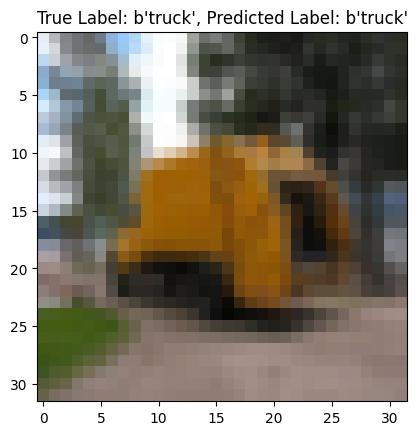

In [22]:
# Visualize a sample test image and its prediction
sample_idx = random.randint(0, len(x_test) - 1)
sample_image = x_test[sample_idx]
prediction = model.predict(sample_image.reshape(1, *sample_image.shape))
predicted_label = np.argmax(prediction)

plt.imshow(sample_image)
plt.title(f'True Label: {label_names[y_test[sample_idx]]}, Predicted Label: {label_names[predicted_label]}')
plt.show()